#**CLASSIFICATION FINALE : RE-APPRENDRE SUR GRAND X POUR TOUTES LES CLASSIFICATIONS :**

**Membres:** Hadjoudja Bachir (21811363), Zeggar Rym (21909615), Bendahmane Rania (21811387), Labiad Youcef (21710780).

In [ ]:
#les imports utilisés
import sys
from numpy import vstack
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pickle
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from tabulate import tabulate
import numpy as np
import spacy
import time
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

In [ ]:
from spacy import displacy

In [ ]:
import spacy

autorisation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


chemin spécifique Google Drive

In [ ]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive
%ls

%pwd

/content/gdrive/My Drive/Colab Notebooks
 avecscaler.pkl
'BON_TRUE FALSE_TOPIC_MODELING.ipynb'
'BON_TRUE FALSE_vs_OTHER.ipynb'
'BON_TRUE FALSE_vs_OTHER_TOPIC_MODELING.ipynb'
 BON_TRUE_vs_FALSE_vs_OTHER_vs_MIXTURE_TOPIC_MODELING.ipynb
 Classification_de_données_textuelles2023.ipynb
 Dataset/
 firstmodel.pkl
'Ingénierie_des_données_textuelles2023 (1).ipynb'
 Ingénierie_des_données_textuelles2023.ipynb
 MyNLPUtilities.py
 newsTrain2.csv
 newsTrain_-_newsTrain.csv
 penguins.csv
 penguins.csv.1
 pkl_modelNB.sav
 Premières_Classifications.ipynb
'Projet ML FakeNEWS_TRUE FALSE_TEXT.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TEXT+TITRE.ipynb'
'Projet ML FakeNEWS_TRUE FALSE_TITRE.ipynb'
 __pycache__/
 ReviewsLabelled.csv
 ReviewsLabelled.csv.1
 ReviewsLabelled.csv.2
 ReviewsLabelled.csv.3
 ReviewsLabelled.csv.4
 ReviewsLabelled.csv.5
 SentimentModel.pkl
 StopWordsFrench.csv
 StopWordsFrench.csv.1
 StopWordsFrench.csv.2
 StopWordsFrench.csv.3
 StopWordsFrench.csv.4
 Topics_extraction.ipynb
 TP1_

'/content/gdrive/My Drive/Colab Notebooks'

Installation des librairies importantes pour la visualisation

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-La fonction qui sera utilisée pour les prétraitements: MyCleanText 
* Mettre le texte en minuscule
* Se débarasser des stopwords
* Se débarasser des nombres
* Stemmatisation
* Lemmatisation ..

-La fonction MyshowAllScores prend le y_test et le y_predict, affiche l'accuracy et le classification report avec la matrice de confusion.

-La fonction add_entity_name qui rajoute les entités nommées à côté du mot si il en existe sinon elle garde le mot

In [ ]:
#...................................................Fonction MyCleanText .............................................................................
# mettre en minuscule
#enlever les stopwords
#se debarasser des nombres
#stemmatisation
#lemmatisation 
#......................................................................................................................................................


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#liste des stopwords en anglais
stop_words = set(stopwords.words('english')) 

def MyCleanText(X,
                lowercase=False, #mettre en minuscule
                removestopwords=False, #supprimer les stopwords
                removedigit=False, #supprimer les nombres
                getstemmer=False, #conserver la racine des termes
                getlemmatisation=False #lemmatisation des termes
                ):
  #conversion du texte d'entrée en chaîne de caractères
    sentence=str(X)
    #suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]

    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
  
    return sentence


def MyshowAllScores(y_test,y_pred):
  classes= np.unique(y_test)
  print("Accuracy : %0.3f"%(accuracy_score(y_test,y_pred)))
  print("Classification Report")
  print(classification_report(y_test,y_pred,digits=5))    
  cnf_matrix = confusion_matrix(y_test,y_pred)
  disp=ConfusionMatrixDisplay(cnf_matrix,display_labels=classes)
  disp.plot()

def add_entity_name(text):
    if text is None or pd.isna(text):
        return ""

    doc = nlp(text)
    # Créer une liste pour stocker les nouveaux tokens
    nouveaux_tokens = []

    # Parcourir les tokens et ajouter des informations selon le type d'entité
    for token in doc:
        if token.ent_type_:
            # Ajouter le nom de l'entité (type d'entité) à côté de l'entité
            nouveaux_tokens.append(f"{token.text} ({token.ent_type_})")
        else:
            nouveaux_tokens.append(token.text)

    # Reconstruire le texte avec les informations ajoutées
    nouveau_texte = " ".join(nouveaux_tokens)
    return nouveau_texte

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* La classe TextNormalizer qui contiendra la fonction MyCleanText.

* Fit_transform de mon corpus propre.

In [ ]:
#..................................................Etape 1 : prétraitement du texte ...................................................................................................
#...................................................Class TextNormalizer  .............................................................................
#fit_transform de mon corpus propre 
#......................................................................................................................................................

from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres  
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False # lemmatisation des termes  
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    

##**Etape 1 : Préparer les données**
* Load et preparer les données à partir des 2 fichiers csv

In [ ]:
dftrain1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/newsTrain2.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain1.reset_index(drop = True, inplace = True)

dftrain2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/newsTrain_-_newsTrain.csv", names=['id','text','title','rating'], header=0,sep=',', encoding='utf8')
dftrain2.reset_index(drop = True, inplace = True)


# concaténer les deux dataframes en ajoutant les lignes du deuxième à la fin du premier
dftrainbase = pd.concat([dftrain1, dftrain2], ignore_index=True)


print("Echantillon de mon dataset \n")
print(dftrainbase.sample(n=10))
print("\n")
print("Quelques informations importantes \n")
dftrainbase.info()
print("\n")
X_text=dftrainbase["text"]
X_title=dftrainbase["title"]


print("le texte est")
display(X_text)
print("\n")
print("le titre est")
display(X_title)
print("\n")
y=dftrainbase.iloc[0:,-1]
print("voici la dernière case de rating")
display(y)
print("\n")
print("la taille de X_text est",X_text.shape)
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
y = y.str.lower()
print("Les valeurs de true et false sont:\n", y.value_counts())


Echantillon de mon dataset 

            id                                               text  \
1163  4d40e3aa  YUKON DELTA NATIONAL WILDLIFE REFUGE, Alaska —...   
106   23bff2ff  Rome, Italy – Italian law enforcement arrested...   
2420  2478493a  In the Atlantic Ocean, Subtle Shifts Hint at D...   
3     f14e8eb6  But things took a turn for the worse when riot...   
445   77e8beff  A record number of people killed themselves in...   
2314  7043de09  Theresa May’s government is under pressure to ...   
2132  b099e01c  The worst murderers should be given a chance t...   
1230  d4903310  A chunk of floating ice that weighs more than ...   
8     c1dc1ac6  In a show of anti-American sentiment that will...   
1740  5daad203  TALLAHASSEE — As the Florida Legislature finis...   

                                                  title   rating  
1163                     Alaska’s Permafrost Is Thawing     TRUE  
106     Italy Arrests Cardinals And Seizes Vatican City    FALSE  
2420  In t

0       Distracted driving causes more deaths in Canad...
1       Missouri politicians have made statements afte...
2       Home Alone 2: Lost in New York is full of viol...
3       But things took a turn for the worse when riot...
4       It’s no secret that Epstein and Schiff share a...
                              ...                        
2523    More than four million calls to the taxman are...
2524    More under-18s are being taken to court for se...
2525    The Government’s much vaunted Help to Buy Isa ...
2526    The late Robin Williams once called cocaine “G...
2527    The late Robin Williams once called cocaine “G...
Name: text, Length: 2528, dtype: object



le titre est


0       You Can Be Fined $1,500 If Your Passenger Is U...
1           Missouri lawmakers condemn Las Vegas shooting
2       CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
                              ...                        
2523    Taxman fails to answer four million calls a ye...
2524    Police catch 11‑year‑olds being used to sell d...
2525    Help to Buy Isa scandal: 500,000 first-time bu...
2526             A coke-snorting generation of hypocrites
2527             A coke-snorting generation of hypocrites
Name: title, Length: 2528, dtype: object



voici la dernière case de rating


0         FALSE
1       mixture
2       mixture
3         FALSE
4         FALSE
         ...   
2523       TRUE
2524       TRUE
2525      FALSE
2526       TRUE
2527       TRUE
Name: rating, Length: 2528, dtype: object



la taille de X_text est (2528,)


la taille de y_train est  (2528,)


Les valeurs de true et false sont:
 false      1156
mixture     716
true        422
other       234
Name: rating, dtype: int64


**Dans ce notebook , nous faisons en sorte de réapprendre sur le grand X pour chaque classification avec le meilleur classifieur et les meilleurs paramètres**

## **Etape 2 : La première classification True vs False (sur la colonne Text) avec les entités nommées :**

In [ ]:
dftrain = dftrainbase
print(dftrain.shape)
print(dftrain)
X=dftrain.iloc[0:,1:3]
y=dftrain.iloc[0:,-1]
print("les valeurs sont " ,y.value_counts())

(2528, 4)
            id                                               text  \
0     5a228e0e  Distracted driving causes more deaths in Canad...   
1     30c605a1  Missouri politicians have made statements afte...   
2     c3dea290  Home Alone 2: Lost in New York is full of viol...   
3     f14e8eb6  But things took a turn for the worse when riot...   
4     faf024d6  It’s no secret that Epstein and Schiff share a...   
...        ...                                                ...   
2523  47423bb6  More than four million calls to the taxman are...   
2524  097c142a  More under-18s are being taken to court for se...   
2525  08bc59f4  The Government’s much vaunted Help to Buy Isa ...   
2526  af3393ce  The late Robin Williams once called cocaine “G...   
2527  a39d07df  The late Robin Williams once called cocaine “G...   

                                                  title   rating  
0     You Can Be Fined $1,500 If Your Passenger Is U...    FALSE  
1         Missouri lawmaker

**Cette fonction,** traite tous les documents de notre corpus, et stocke toutes les entités nommées dans une liste

In [ ]:
nlp = spacy.load("en_core_web_sm")
texte=dftrain['text']
#Créer une liste pour stocker les entités nommées
entities = []
# Traiter chaque texte individuellement et ajouter les entités à la liste
for phrase in texte:
    phrase_str = str(phrase)  # Convertir l'élément en chaîne de caractères
    doc = nlp(phrase_str)
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))


# Afficher les entités nommées
for entity in entities:
    print(entity[0], entity[1])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2/27/1976 DATE
Chicago GPE
February 20, 2017 DATE
Ottumwa GPE
Iowa GPE
Wednesday DATE
79 degrees QUANTITY
monthly DATE
February DATE
Kansas City GPE
seven-day DATE
February DATE
Wednesday DATE
Monday DATE
Chicago GPE
70 degrees QUANTITY
fifth ORDINAL
February DATE
fourth ORDINAL
February DATE
Midwest LOC
the Great Lakes LOC
days DATE
Feb. 22 DATE
just 19.1 percent PERCENT
48 CARDINAL
this time of year DATE
Midwest LOC
Nebraska GPE
Wisconsin GPE
South LOC
East LOC
U.S. GPE
the past few weeks DATE
daily DATE
daily DATE
more than 4-to-1 CARDINAL
the past several decades DATE
U.S. GPE
3rd ORDINAL
January DATE
2016 DATE
about 1.7 degrees QUANTITY
Fahrenheit WORK_OF_ART
1880 DATE
about 1-to-1 CARDINAL
2009 DATE
2 CARDINAL
48 CARDINAL
the 2000s DATE
coming decades DATE
as high as 15 CARDINAL
One CARDINAL
Deke Arndt PERSON
NCEI ORG
a few years DATE
This week DATE
season DATE
USA GPE
months DATE
overnight TIME
70-degr

On applique ici la fonction add_entity_name sur la colonne text pour rajouter les entités nommées

In [ ]:

dftrain['text'] = dftrain['text'].astype(str)
print(dftrain.shape)

# Appliquer la fonction à la colonne "title"
dftrain['text'] = dftrain['text'].apply(add_entity_name)

print(dftrain['text'])

(2528, 4)
0       Distracted driving causes more deaths in Canad...
1       Missouri (GPE) politicians have made statement...
2       Home Alone 2 : Lost in New (GPE) York (GPE) is...
3       But things took a turn for the worse when riot...
4       It ’s no secret that Epstein (PRODUCT) and Sch...
                              ...                        
2523    More (CARDINAL) than (CARDINAL) four (CARDINAL...
2524    More under-18s are being taken to court for se...
2525    The Government ’s much vaunted Help to Buy (OR...
2526    The late Robin (PERSON) Williams (PERSON) once...
2527    The late Robin (PERSON) Williams (PERSON) once...
Name: text, Length: 2528, dtype: object


On séléctionne les colonnes où on a que TRUE ou bien FALSE

In [ ]:
dftraintf=dftrain
dftraintf= dftraintf.loc[dftraintf['rating'].isin(['TRUE','FALSE'])]
print(dftrain.shape)
print(dftraintf.shape)
y=dftraintf.iloc[0:,-2]
print(y)

(2528, 4)
(1578, 4)
0       You Can Be Fined $1,500 If Your Passenger Is U...
3       Obama’s Daughters Caught on Camera Burning US ...
4       Leaked Visitor Logs Reveal Schiff’s 78 Visits ...
6       FDA Shocking Study: Cells Used In Vaccines Con...
7       Israel Hits Beirut with Nuclear Missile, Trump...
                              ...                        
2523    Taxman fails to answer four million calls a ye...
2524    Police catch 11‑year‑olds being used to sell d...
2525    Help to Buy Isa scandal: 500,000 first-time bu...
2526             A coke-snorting generation of hypocrites
2527             A coke-snorting generation of hypocrites
Name: title, Length: 1578, dtype: object


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de FALSE de telle sorte que le nombre de lignes de FALSE soit = au nbr de lignes de TRUE. et on mélange le DataFrame.

In [ ]:
# Compter le nombre d'observations dans chaque catégorie
df_true = dftraintf[dftraintf['rating']=="TRUE"]
df_false = dftraintf[dftraintf['rating']=="FALSE"]

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_false_subsampled = df_false.sample(n=len(df_true), random_state=42)

# Concaténer les deux dataframes
dftraintf = pd.concat([df_false_subsampled, df_true])

# Mélanger aléatoirement les données
dftraintf = dftraintf.sample(frac=1, random_state=42)



print(dftraintf)
X_text=dftraintf["text"]
X_title=dftraintf["title"]
print("La taille de X_text",X_text.shape)
y=dftraintf.iloc[0:,-1]
print(y.shape)
print("\n")
print("la taille de y est " ,y.shape)
print("\n")
print("les valeurs de TRUE et FALSE maintenant sont " ,y.value_counts())

            id                                               text  \
615   f85ea242  It ’s been a long time coming , but finally we...   
1303  684c9ba4  Constitutional Attorney Matthew (PERSON) DePer...   
1232  6c88493a  The (GPE) United (GPE) States (GPE) is witness...   
2022  2aac10a5  After three (DATE) decades (DATE) on the bench...   
287   1e83af88  Based on actual results and accounting for sta...   
...        ...                                                ...   
1006  0de76e26  5 (MONEY) Million (MONEY) Muslim (MONEY) Child...   
1543  3886ead8  The bombshell claim comes from over (TIME) 20 ...   
853   8e197ce3  BILL (ORG) GATES (ORG) EXPLAINS (ORG) THAT (OR...   
296   01ed1b22  Let our journalists help you make sense of the...   
1325  31d33510  Though the whole world relies on RT (ORG) - (O...   

                                                  title rating  
615   JK Rowling Confirms Stance Against Transgender...   TRUE  
1303  MI Sec of State Official Caught On 

On split notre jeu de données en jeu d'apprentissage et de test (20% pour le test)

In [ ]:
X=dftraintf['text']
print(X)

X_train,X_test_1,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test_1)
print("y_test is",y_test)
y_test_1=y_test

615     It ’s been a long time coming , but finally we...
1303    Constitutional Attorney Matthew (PERSON) DePer...
1232    The (GPE) United (GPE) States (GPE) is witness...
2022    After three (DATE) decades (DATE) on the bench...
287     Based on actual results and accounting for sta...
                              ...                        
1006    5 (MONEY) Million (MONEY) Muslim (MONEY) Child...
1543    The bombshell claim comes from over (TIME) 20 ...
853     BILL (ORG) GATES (ORG) EXPLAINS (ORG) THAT (OR...
296     Let our journalists help you make sense of the...
1325    Though the whole world relies on RT (ORG) - (O...
Name: text, Length: 844, dtype: object
X_train is 1867    ( CNN (ORG) ) From the moment a child is born ...
1540    During the (ORG) Republican (ORG) National (OR...
2495    A large research synthesis , published in one ...
1197    Global warming could be far worse than predict...
788     Nearly (CARDINAL) 40,000 (CARDINAL) Wisconsini...
                      

**On applique le pipeline du meilleur classifieur trouvé sur le X_train et le y_train**

In [ ]:
# création du pipeline en ajoutant le classifier
pipe = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=True,removedigit=False)), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("SVM", SVC(C=2, gamma='scale', kernel='rbf', random_state=42))])

                
pipetexte=pipe.fit(X_train,y_train)
print("à présent",y)

#save pipe
print("pipeline créé")

à présent 615      TRUE
1303    FALSE
1232     TRUE
2022     TRUE
287     FALSE
        ...  
1006    FALSE
1543    FALSE
853     FALSE
296      TRUE
1325    FALSE
Name: rating, Length: 844, dtype: object
pipeline créé


**On predict et on affiche le classification report et la matrice de confusion**

Accuracy : 0.941
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92941   0.95181   0.94048        83
        TRUE    0.95238   0.93023   0.94118        86

    accuracy                        0.94083       169
   macro avg    0.94090   0.94102   0.94083       169
weighted avg    0.94110   0.94083   0.94083       169



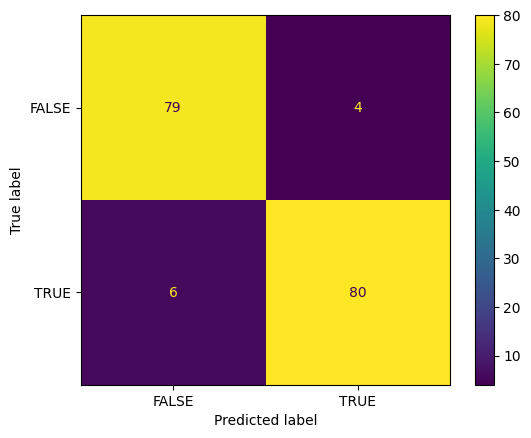

In [ ]:
y_pred_1=pipetexte.predict(X_test_1)
MyshowAllScores(y_test,y_pred_1)

###**Visualisation :**

On trace la répartition de nos données selon le label TRUE et FALSE, on affiche la vraie répartition ici (y_test = ce qu'on était censés avoir)

In [ ]:
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
from sklearn.manifold import TSNE
# Umap 
import umap.plot
from umap import UMAP

X_test_copy = X_test_1.copy()

tfidf=TfidfVectorizer()
vector_tfidf=tfidf.fit_transform(X_test_copy)

# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)

fig = px.scatter(
    projection, x=0, y=1,
    color=y_test, labels={'color': 'RATING'},
    color_discrete_sequence=['#FF0000', '#0000FF'])

fig.show() 

On affiche la répartition qu'on predit (y_pred)

In [ ]:
# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)


fig = px.scatter(
    projection, x=0, y=1,
    color=y_pred_1, labels={'color': 'RATING'},
    color_discrete_sequence=['#0000FF','#FF0000'])

fig.show() 

## **Etape 3 : La deuxième classification selon True/False et Other (sur la colonne texte et titre combinés) avec les entités nommées**

On applique ici la fonction add_entity_name sur la colonne titre pour rajouter les entités nommées

In [ ]:
dftrain['title'] = dftrain['title'].astype(str)

# Appliquer la fonction à la colonne "title"
dftrain['title'] = dftrain['title'].apply(add_entity_name)
print(dftrain.head())

         id                                               text  \
0  5a228e0e  Distracted driving causes more deaths in Canad...   
1  30c605a1  Missouri (GPE) politicians have made statement...   
2  c3dea290  Home Alone 2 : Lost in New (GPE) York (GPE) is...   
3  f14e8eb6  But things took a turn for the worse when riot...   
4  faf024d6  It ’s no secret that Epstein (PRODUCT) and Sch...   

                                               title   rating  
0  You Can Be Fined $ 1,500 (MONEY) If Your Passe...    FALSE  
1  Missouri (GPE) lawmakers condemn Las (GPE) Veg...  mixture  
2  CBC Cuts Donald (PERSON) Trump (PERSON) 's (PE...  mixture  
3  Obama (ORG) ’s (ORG) Daughters (ORG) Caught (O...    FALSE  
4  Leaked Visitor Logs Reveal Schiff ’s 78 (CARDI...    FALSE  


* On concatène les deux colonnes text et titre pour appliquer la classification
* On séléctionne que les lignes où on a TRUE, FALSE et OTHER
* On crée une colonne regrouped qui va être soit TRUE/FALSE si la valeur dans rating est soit TRUE soit FALSE sinon OTHER

In [ ]:
dftrain3=dftrain
dftrain3['text_title'] = dftrain3[['text', 'title']].apply(lambda x: '-'.join(x), axis=1)
dftrain3 = dftrain3.loc[dftrain3['rating'].isin(['TRUE','FALSE', 'other'])]

#On crée une colonne regroupe qui va mettre dans les lignes là où a true ou bien false la valeur TRUE/FALSE et OTHER ça laisse
dftrain3['regrouped'] = dftrain3['rating'].apply(lambda x:'TRUE/FALSE' if x in ['TRUE', 'FALSE'] else 'other')

X_text_title=dftrain3['text_title']
#print(X_text_title)
X_text_title.reset_index(drop = True, inplace = True)
print(dftrain3)

            id                                               text  \
0     5a228e0e  Distracted driving causes more deaths in Canad...   
3     f14e8eb6  But things took a turn for the worse when riot...   
4     faf024d6  It ’s no secret that Epstein (PRODUCT) and Sch...   
5     c03ed5db  Nation   UPDATED 8:23 (TIME) PM (TIME) - K A B...   
6     61bd9a69  November (DATE) 23 (DATE) , (DATE) 2019 (DATE)...   
...        ...                                                ...   
2523  47423bb6  More (CARDINAL) than (CARDINAL) four (CARDINAL...   
2524  097c142a  More under-18s are being taken to court for se...   
2525  08bc59f4  The Government ’s much vaunted Help to Buy (OR...   
2526  af3393ce  The late Robin (PERSON) Williams (PERSON) once...   
2527  a39d07df  The late Robin (PERSON) Williams (PERSON) once...   

                                                  title rating  \
0     You Can Be Fined $ 1,500 (MONEY) If Your Passe...  FALSE   
3     Obama (ORG) ’s (ORG) Daughters (O

<ipython-input-163-b38ef8f57fac>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de TRUE/FALSE de telle sorte que le nombre de lignes de TRUE/FALSE soit = au nbr de lignes de OTHER. et on mélange le DataFrame.

In [ ]:
# Séparer les classes en deux dataframes
df_false_true = dftrain3[dftrain3['regrouped'] == 'TRUE/FALSE']
df_other = dftrain3 [dftrain3['regrouped'] == 'other']

# Sous-échantillonner la classe majoritaire (FALSE) pour obtenir un nombre égal d'échantillons pour chaque classe
df_subsampled = df_false_true.sample(n=len(df_other), random_state=42)

# Concaténer les deux dataframes
dftrain3 = pd.concat([df_subsampled, df_other])
print(dftrain3)
# Mélanger aléatoirement les données
dftrain3 = dftrain3.sample(frac=1, random_state=42)
y=dftrain3['regrouped']
print(X_text_title.shape)
print(y.value_counts())

            id                                               text  \
1889  c57f8234  People with lung cancer are dying after being ...   
1299  b5bf9ed6  Update 1040ET (CARDINAL) : Science moves fast ...   
1788  57d407f9  The majority of Britons (GPE) say the police h...   
781   94c9b8ce  Dr. Kemi (PERSON) Olunloye (PERSON) , a traine...   
748   83ac5f2a  Mike (PERSON) Bloomberg (PERSON) has been plun...   
...        ...                                                ...   
2389  44d974ca  The announcement follows the publication of a ...   
2412  716a397b  Millennials are on track to become the first (...   
2464  d17185d3  Like what ?   Helen (PERSON) Harwatt (PERSON) ...   
2489  3a90d9c8  The dramatic melting of Arctic (LOC) ice is al...   
2522  39f5c37f  The announcement follows the publication of a ...   

                                                  title rating  \
1889  A team of scientists from Canada (GPE) have id...  FALSE   
1299  Coronavirus (ORG) Contains (ORG) 

On scinde notre jeu de données en 80% jeu d'apprentissage et 20% de jeu de test

In [ ]:

X=dftrain3["text_title"]
print(X)


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train.shape)
print("y_train is",y_train.shape)
print("X_test is",X_test.shape)
print("y_test is",y_test.shape)

947     War - torn eastern regions of Ukraine (GPE) ha...
2224    TIJUANA , Mexico (GPE) — It ’s the image from ...
1307    Today , Congresswoman Maxine Waters D - CA , C...
798     Meghan (PERSON) Markle (PERSON) will use the f...
320     Further proof that Democrats (NORP) are the gr...
                              ...                        
1160    The scale of Antarctica (LOC) is startling . M...
570     Coronavirus (ORG) may be sexually transmitted ...
1200    Like what ?   Helen (PERSON) Harwatt (PERSON) ...
2190    Tumeric kills cancer not patient-Vermont (GPE)...
391     WASHINGTON (GPE) , DC – The Pentagon (ORG) has...
Name: text_title, Length: 468, dtype: object
X_train is (374,)
y_train is (374,)
X_test is (94,)
y_test is (94,)


**On applique le pipeline du meilleur classifieur trouvé sur le X_train et le y_train**

In [ ]:
# création du pipeline en ajoutant le classifier
pipe = Pipeline([('cleaner', TextNormalizer(removestopwords=True,lowercase=True,
                                               getstemmer=False,removedigit=False)), 
                    ('count_vectorizer', CountVectorizer(lowercase=False)),
                    ("SVM", SVC(C=1, gamma=0.1, kernel='rbf', random_state=42))])

pipetexte=pipe.fit(X_train,y_train)
print("à présent",y)

#save pipe
print("pipeline créé")

à présent 947     TRUE/FALSE
2224    TRUE/FALSE
1307    TRUE/FALSE
798          other
320     TRUE/FALSE
           ...    
1160    TRUE/FALSE
570          other
1200         other
2190         other
391     TRUE/FALSE
Name: regrouped, Length: 468, dtype: object
pipeline créé


**On predict et on affiche le classification report et la matrice de confusion**

Accuracy : 0.936
Classification Report
              precision    recall  f1-score   support

  TRUE/FALSE    0.86957   1.00000   0.93023        40
       other    1.00000   0.88889   0.94118        54

    accuracy                        0.93617        94
   macro avg    0.93478   0.94444   0.93570        94
weighted avg    0.94450   0.93617   0.93652        94



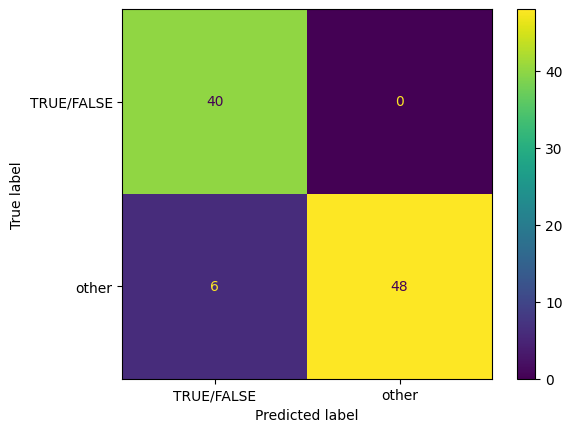

In [ ]:

y_pred=pipetexte.predict(X_test)
MyshowAllScores(y_test,y_pred)

###**Visualisation:**

On trace la répartition de nos données selon le label TRUE/FALSE et OTHER, on affiche la vraie répartition ici (y_test = ce qu'on était censés avoir)

In [ ]:
X_test_copy = X_test.copy()

tfidf=TfidfVectorizer()
vector_tfidf=tfidf.fit_transform(X_test_copy)

# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)

fig = px.scatter(
    projection, x=0, y=1,
    color=y_test, labels={'color': 'RATING'},
    color_discrete_sequence=['#FF0000', '#0000FF'])

fig.show() 

On affiche la répartition qu'on predit (y_pred)

In [ ]:
# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)


fig = px.scatter(
    projection, x=0, y=1,
    color=y_pred, labels={'color': 'RATING'},
    color_discrete_sequence=['#FF0000', '#0000FF'])

fig.show() 

## **Etape 4 : La troisième classification selon True/False/mixture/other (sur la colonne texte)**

**On a déjà fait la classification selon True et False , maintenat faisons celle selon mixture et other avec les meilleurs paramètres recueillis à partir des tests**

On séléctionne que les lignes où on a OTHER ou MIXTURE

In [ ]:
dftrain = dftrainbase.loc[dftrainbase['rating'].isin(['other', 'mixture'])]
y=dftrain.iloc[0:,-2]
print(y)
print("les valeurs de MIXTURE et OTHER maintenant sont " ,y.value_counts())

1       mixture
2       mixture
5         other
10      mixture
13      mixture
         ...   
2517    mixture
2518    mixture
2519    mixture
2520    mixture
2522      other
Name: rating, Length: 950, dtype: object
les valeurs de MIXTURE et OTHER maintenant sont  mixture    716
other      234
Name: rating, dtype: int64


Le jeu de données étant déséquilibré, on a pensé à appliquer le downsampling pour équilibrer nos données. on séléctionne des lignes aléatoirement de OTHER et MIXTURE de telle sorte que le nombre de lignes de OTHER ou MIXTURE soit = au nbr de lignes de la classe avec le plus petit nombre de lignes. et on mélange le DataFrame.

In [ ]:
# Compter le nombre d'observations dans chaque catégorie
mixture_count = dftrain['rating'].value_counts()['mixture']
other_count = dftrain['rating'].value_counts()['other']

# Trouver le nombre minimum d'observations parmi les catégories
min_count = min( mixture_count, other_count)

# Sous-échantillonner les catégories pour équilibrer les quantités
mixture_sampled = dftrain[dftrain['rating'] == 'mixture'].sample(min_count, random_state=42)
other_sampled = dftrain[dftrain['rating'] == 'other'].sample(min_count, random_state=42)


# Concaténer les échantillons pour obtenir un nouveau dataframe équilibré
dftrain = pd.concat([mixture_sampled,other_sampled])

# Mélanger aléatoirement les données
dftrain = dftrain.sample(frac=1, random_state=42)
X_text=dftrain["text"]
X_title=dftrain["title"]
y=dftrain.iloc[0:,-2]
print("\n")
print("la taille de y_train est " ,y.shape)
print("\n")
print("les valeurs de OTHER et MIXTURE maintenant sont " ,y.value_counts())



la taille de y_train est  (468,)


les valeurs de OTHER et MIXTURE maintenant sont  mixture    234
other      234
Name: rating, dtype: int64


On applique ici la fonction add_entity_name sur la colonne text pour rajouter les entités nommées

In [ ]:
dftrain['text'] = dftrain['text'].apply(add_entity_name)

On scinde notre jeu de données en 80% jeu d'apprentissage et 20% de jeu de test

In [ ]:
X=dftrain["text"]
print(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state=8)
print("X_train is",X_train)
print("y_train is",y_train)
print("X_test is",X_test)
print("y_test is",y_test)
y_test_2 = y_test

2236    For immediate release : For more information :...
2450    Despite recent attempts to paint the ( GPE ) U...
1802    RT (ORG) ( (ORG) ORG (ORG) ) (ORG) America (OR...
2359    A blitz on helping people with drink , drug an...
1931    From new funding to support veterans to reduci...
                              ...                        
1887    By Jim (PERSON) ( PERSON ) Francesconi ( PERSO...
1940    On Tuesday (DATE) ( DATE ) , radio show host J...
1837    EXCLUSIVE : Third (ORDINAL) ( ORDINAL ) of cas...
458     We all need to keep in mind that , except for ...
817     Aung (PERSON) ( GPE (ORG) ) San Suu Kyi Reside...
Name: text, Length: 468, dtype: object
X_train is 1057    The ( ORG ) NHS ( ORG ) Long ( ORG ) Term ( OR...
440     WASHINGTON (GPE) ( GPE (ORG) ) , DC – The ( OR...
1290    CONTACT : Bryan (PERSON) ( PERSON ) Kennedy (P...
1137    52 (PERCENT) ( (PERCENT) PERCENT (PERCENT) ) (...
1518    Cash - strapped schools are spending a record ...
                      

**On applique le pipeline du meilleur classifieur trouvé sur le X_train et le y_train**

In [ ]:
# création du pipeline en ajoutant le classifier
pipe =  Pipeline ([('cleaner', TextNormalizer()), 
                    ('tfidf_vectorizer', TfidfVectorizer(lowercase=False)),
                    ("SVM", SVC(C=2, gamma='scale', kernel='rbf', random_state=42))])
pipetexte=pipe.fit(X_train,y_train)
print("à présent",y_train)

#save pipe
print("pipeline créé")

à présent 1057      other
440     mixture
1290    mixture
1137    mixture
1518    mixture
         ...   
633     mixture
2368    mixture
2111      other
164     mixture
1149    mixture
Name: rating, Length: 374, dtype: object
pipeline créé


**On predict et on affiche le classification report et la matrice de confusion**

208     This is one in a series of articles taken from...
2245    High earners in professional jobs , such as do...
263     Biden (PERSON) ( PERSON ) Has ( PERSON ) Been ...
2081    Aung (PERSON) ( GPE (ORG) ) San Suu Kyi Reside...
1046    By Jim (PERSON) ( PERSON ) Francesconi ( PERSO...
                              ...                        
1995    SHARE By of the Waukesha (GPE) ( GPE (ORG) ) -...
768     Bois (PERSON) ( ORG ) State ( ORG (ORG) ) (ORG...
941     It was an accurate and judicious answer , so n...
2385    L ondoners living in the borough of Greenwich ...
1269    Nation    UPDATED 8:23 ( TIME (ORG) ) PM ( TIM...
Name: text, Length: 94, dtype: object
Accuracy : 0.883
Classification Report
              precision    recall  f1-score   support

     mixture    0.82222   0.92500   0.87059        40
       other    0.93878   0.85185   0.89320        54

    accuracy                        0.88298        94
   macro avg    0.88050   0.88843   0.88190        94
weighted avg 

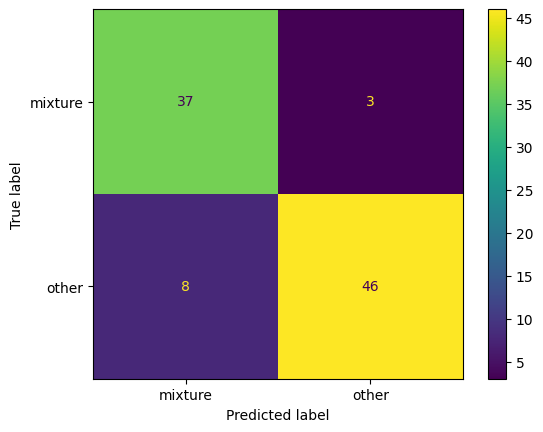

In [ ]:
X_test_text=X_test
print(X_test_text)
y_pred_2=pipetexte.predict(X_test_text)
MyshowAllScores(y_test,y_pred_2)

**On concatène les deux y_test et y_pred des deux classifications TRUE vs FALSE et de OTHER vs MIXTURE pour pouvoir tracer la matrice de confusion et le classification report final**

Accuracy : 0.920
Classification Report
              precision    recall  f1-score   support

       FALSE    0.92941   0.95181   0.94048        83
        TRUE    0.95238   0.93023   0.94118        86
     mixture    0.82222   0.92500   0.87059        40
       other    0.93878   0.85185   0.89320        54

    accuracy                        0.92015       263
   macro avg    0.91070   0.91472   0.91136       263
weighted avg    0.92254   0.92015   0.92037       263



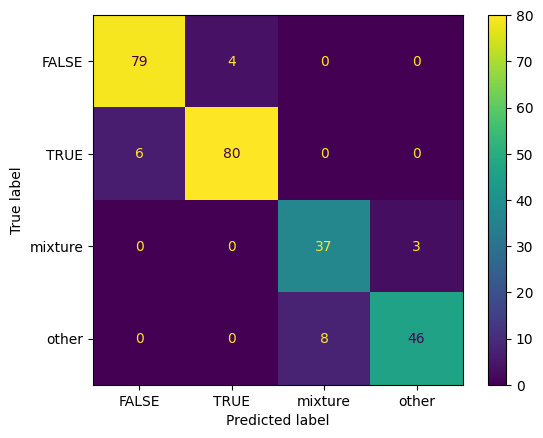

In [ ]:
# Conversion de tableaux NumPy en objets Series Pandas
y_pred_1 = pd.Series(y_pred_1)
y_pred_2 = pd.Series(y_pred_2)
#concat
y_pred_final = pd.concat([y_pred_1, y_pred_2], ignore_index=True)
y_test_final = pd.concat([y_test_1, y_test_2], ignore_index=True)
#dernier test
MyshowAllScores(y_test_final,y_pred_final)

###**Visualisation:**

* On trace la répartition de nos données selon le label TRUE ou FALSE ou OTHER ou MIXTURE, on affiche la vraie répartition ici (y_test = ce qu'on était censés avoir) 
* Le X_test devient la combinaison des deux aussi

In [ ]:
X_test_copy = pd.concat([X_test_text, X_test_1], ignore_index=True)

tfidf=TfidfVectorizer()
vector_tfidf=tfidf.fit_transform(X_test_copy)

# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)

fig = px.scatter(
    projection, x=0, y=1,
    color=y_test_final, labels={'color': 'RATING'},
    color_discrete_sequence=['#FF0000', '#0000FF'])

fig.show() 

On affiche la répartition qu'on predit (y_pred)

In [ ]:
# 2D
umap = UMAP(n_components=2, init='random', random_state=0)
projection = umap.fit_transform(vector_tfidf)


fig = px.scatter(
    projection, x=0, y=1,
    color=y_pred_final, labels={'color': 'RATING'},
    color_discrete_sequence=['#0000FF','#FF0000'])

fig.show() 